In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
details = pd.read_csv("../data_for_simulation.csv", index_col=0)
moves = pd.read_csv("../moves.csv", index_col=0)
result = pd.read_csv("../result.csv", index_col=0)
details = details.merge(result)

In [4]:
pd.set_option("display.max_columns", None)
details["total"] = details.loc[:, "hp":"speed"].sum(axis=1)
details["win_pct"] = round(details["win"] / len(details) * 100, 2)
details["lose_pct"] = round(details["lose"] / len(details) * 100, 2)
details["position"] = details["win"].rank(method="average", ascending=False)

In [5]:
details.loc[details["name"] == "Mew", "gen"] = 1

In [6]:
gen_range = [
    (1, 151),
    (152, 251),
    (252, 386),
    (387, 493),
    (494, 649),
    (650, 721),
    (722, 809),
    (810, 905),
    (906, 1025),
]
for i, range_ in enumerate(gen_range):
    in_between_range = details["number"].between(range_[0], range_[1])
    details.loc[in_between_range, "gen"] = i + 1

In [7]:
details.head()

,number,name,type1,type2,total,hp,attack,defense,special_attack,special_defense,speed,main_attack,category,win,lose,leg_win,leg_lose,myth_win,myth_lose,mega_win,mega_lose,norm_win,norm_lose,win_pct,lose_pct,position,gen
0,1,Bulbasaur,Grass,Poison,493.0,120.0,69.0,69.0,85.0,85.0,65.0,85.0,normal,298,921,5,81,2,27,1,51,290,742,24.45,75.55,936.0,1.0
1,2,Ivysaur,Grass,Poison,580.0,135.0,82.0,83.0,100.0,100.0,80.0,100.0,normal,481,738,7,79,6,23,3,49,461,571,39.46,60.54,748.0,1.0
2,3,Venusaur,Grass,Poison,700.0,155.0,102.0,103.0,120.0,120.0,100.0,120.0,normal,731,488,12,74,10,19,11,41,691,341,59.97,40.03,436.0,1.0
3,3,Mega Venusaur,Grass,Poison,800.0,155.0,120.0,143.0,142.0,140.0,100.0,142.0,mega_evolution,889,330,26,60,14,15,18,34,821,211,72.93,27.07,182.5,1.0
4,4,Charmander,Fire,Nil,484.0,114.0,72.0,63.0,80.0,70.0,85.0,80.0,normal,217,1002,1,85,1,28,1,51,214,818,17.80,82.20,1033.0,1.0


In [8]:
numerical = [
    "total",
    "hp",
    "attack",
    "defense",
    "special_attack",
    "special_defense",
    "speed",
    "main_attack",
    "win",
    "lose",
    "leg_win",
    "leg_lose",
    "myth_win",
    "myth_lose",
    "mega_win",
    "mega_lose",
    "norm_win",
    "norm_lose",
]
# details.columns

In [9]:
details.loc[:, numerical].corr()

,total,hp,attack,defense,special_attack,special_defense,speed,main_attack,win,lose,leg_win,leg_lose,myth_win,myth_lose,mega_win,mega_lose,norm_win,norm_lose
total,1.000000,0.659640,0.731586,0.640264,0.719187,0.722770,0.563288,0.842772,0.950613,-0.950613,0.858585,-0.858585,0.840037,-0.840037,0.844313,-0.844313,0.948088,-0.948088
hp,0.659640,1.000000,0.461862,0.333042,0.358419,0.394572,0.182359,0.483030,0.647568,-0.647568,0.588505,-0.588505,0.557703,-0.557703,0.570614,-0.570614,0.646354,-0.646354
attack,0.731586,0.461862,1.000000,0.469533,0.330726,0.277902,0.377512,0.819126,0.728862,-0.728862,0.657417,-0.657417,0.646938,-0.646938,0.638108,-0.638108,0.727866,-0.727866
defense,0.640264,0.333042,0.469533,1.000000,0.233174,0.533933,0.020180,0.443620,0.650968,-0.650968,0.616047,-0.616047,0.610703,-0.610703,0.615402,-0.615402,0.644898,-0.644898
special_attack,0.719187,0.358419,0.330726,0.233174,1.000000,0.516706,0.425369,0.699561,0.662963,-0.662963,0.597113,-0.597113,0.609479,-0.609479,0.598324,-0.598324,0.659851,-0.659851
special_defense,0.722770,0.394572,0.277902,0.533933,0.516706,1.000000,0.240713,0.452161,0.654208,-0.654208,0.596020,-0.596020,0.563065,-0.563065,0.580852,-0.580852,0.651978,-0.651978
speed,0.563288,0.182359,0.377512,0.020180,0.425369,0.240713,1.000000,0.464103,0.491171,-0.491171,0.409807,-0.409807,0.395903,-0.395903,0.402061,-0.402061,0.494755,-0.494755
main_attack,0.842772,0.483030,0.819126,0.443620,0.699561,0.452161,0.464103,1.000000,0.867586,-0.867586,0.790074,-0.790074,0.777669,-0.777669,0.774920,-0.774920,0.864521,-0.864521
win,0.950613,0.647568,0.728862,0.650968,0.662963,0.654208,0.491171,0.867586,1.000000,-1.000000,0.891268,-0.891268,0.886787,-0.886787,0.882645,-0.882645,0.998353,-0.998353
lose,-0.950613,-0.647568,-0.728862,-0.650968,-0.662963,-0.654208,-0.491171,-0.867586,-1.000000,1.000000,-0.891268,0.891268,-0.886787,0.886787,-0.882645,0.882645,-0.998353,0.998353


In [10]:
details.describe()

,number,total,hp,attack,defense,special_attack,special_defense,speed,main_attack,win,lose,leg_win,leg_lose,myth_win,myth_lose,mega_win,mega_lose,norm_win,norm_lose,win_pct,lose_pct,position,gen
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.00000,1219.000000
mean,501.408532,618.678425,146.285480,101.286300,95.079573,93.355209,92.558655,90.113208,112.123052,574.251025,644.748975,16.875308,69.124692,7.262510,21.737490,9.500410,42.499590,536.492207,495.507793,47.108433,52.891567,610.00000,4.624282
std,299.015191,121.438153,26.894684,32.077916,30.723718,32.823121,27.621274,30.159597,31.988780,288.773516,288.773516,15.881515,15.881515,6.727025,6.727025,9.854306,9.854306,256.810461,256.810461,23.689366,23.689366,352.03868,2.649150
min,1.000000,350.000000,76.000000,25.000000,25.000000,30.000000,40.000000,25.000000,30.000000,12.000000,11.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,12.000000,5.000000,0.980000,0.900000,1.00000,1.000000
25%,239.500000,509.000000,127.500000,77.500000,72.000000,70.000000,71.000000,65.000000,89.000000,316.000000,424.000000,3.000000,60.000000,1.000000,17.000000,1.000000,36.000000,308.500000,293.500000,25.920000,34.780000,305.50000,2.000000
50%,495.000000,640.000000,145.000000,100.000000,90.000000,85.000000,90.000000,89.000000,110.000000,610.000000,609.000000,12.000000,74.000000,6.000000,23.000000,7.000000,45.000000,578.000000,454.000000,50.040000,49.960000,610.00000,5.000000
75%,752.500000,700.000000,160.000000,120.000000,111.000000,115.000000,110.000000,111.000000,135.000000,795.000000,903.000000,26.000000,83.000000,12.000000,28.000000,16.000000,51.000000,738.500000,723.500000,65.220000,74.080000,915.00000,7.000000
max,1025.000000,1300.000000,330.000000,210.000000,270.000000,214.000000,270.000000,220.000000,214.000000,1208.000000,1207.000000,82.000000,86.000000,28.000000,29.000000,51.000000,52.000000,1027.000000,1020.000000,99.100000,99.020000,1219.00000,9.000000


In [11]:
print("attck", details.loc[details["attack"] == details["attack"].max()]["name"])
print(
    "special_attck",
    details.loc[details["special_attack"] == details["special_attack"].max()]["name"],
)
print("defense", details.loc[details["defense"] == details["defense"].max()]["name"])
print("speed", details.loc[details["speed"] == details["speed"].max()]["name"])
print(
    "special_defense",
    details.loc[details["special_defense"] == details["special_defense"].max()]["name"],
)
print("total", details.loc[details["total"] == details["total"].max()]["name"])

attck 203    Mega Mewtwo X
Name: name, dtype: object
special_attck 204    Mega Mewtwo Y
Name: name, dtype: object
defense 1062    Eternatus Eternamax
Name: name, dtype: object
speed 1067    Regieleki
Name: name, dtype: object
special_defense 1062    Eternatus Eternamax
Name: name, dtype: object
total 1062    Eternatus Eternamax
Name: name, dtype: object


### Starters

In [12]:
starters = starter_pokemon_list = [
    # Kanto Region
    "Bulbasaur",
    "Charmander",
    "Squirtle",
    # Johto Region
    "Chikorita",
    "Cyndaquil",
    "Totodile",
    # Hoenn Region
    "Treecko",
    "Torchic",
    "Mudkip",
    # Sinnoh Region
    "Turtwig",
    "Chimchar",
    "Piplup",
    # Unova Region
    "Snivy",
    "Tepig",
    "Oshawott",
    # Kalos Region
    "Chespin",
    "Fennekin",
    "Froakie",
    # Alola Region
    "Rowlet",
    "Litten",
    "Popplio",
    # Galar Region
    "Grookey",
    "Scorbunny",
    "Sobble",
    # Paldea Region
    "Sprigatito",
    "Fuecoco",
    "Quaxly",
]

In [13]:
def get_starter_data(details, starters):
    # starter_data = pd.DataFrame()
    for i, starter in enumerate(starters):
        stage1 = details.loc[details["name"] == starter]
        num = stage1.index[0]
        full_evolution_line = details.loc[num : num + 2, :]
        if i == 0:
            starter_data = full_evolution_line
        else:
            starter_data = pd.concat([starter_data, full_evolution_line])
    return starter_data

In [14]:
starter_data = get_starter_data(details, starters)

In [15]:
starter_data.index = range(0, len(starter_data))
starter_data["stage"] = [i % 3 + 1 for i in range(0, len(starter_data))]
starter_data.head()

,number,name,type1,type2,total,hp,attack,defense,special_attack,special_defense,speed,main_attack,category,win,lose,leg_win,leg_lose,myth_win,myth_lose,mega_win,mega_lose,norm_win,norm_lose,win_pct,lose_pct,position,gen,stage
0,1,Bulbasaur,Grass,Poison,493.0,120.0,69.0,69.0,85.0,85.0,65.0,85.0,normal,298,921,5,81,2,27,1,51,290,742,24.45,75.55,936.0,1.0,1
1,2,Ivysaur,Grass,Poison,580.0,135.0,82.0,83.0,100.0,100.0,80.0,100.0,normal,481,738,7,79,6,23,3,49,461,571,39.46,60.54,748.0,1.0,2
2,3,Venusaur,Grass,Poison,700.0,155.0,102.0,103.0,120.0,120.0,100.0,120.0,normal,731,488,12,74,10,19,11,41,691,341,59.97,40.03,436.0,1.0,3
3,4,Charmander,Fire,Nil,484.0,114.0,72.0,63.0,80.0,70.0,85.0,80.0,normal,217,1002,1,85,1,28,1,51,214,818,17.80,82.20,1033.0,1.0,1
4,5,Charmeleon,Fire,Nil,580.0,133.0,84.0,78.0,100.0,85.0,100.0,100.0,normal,437,782,7,79,3,26,5,47,422,610,35.85,64.15,794.0,1.0,2


In [16]:
starter_data.nsmallest(5, "position")

,number,name,type1,type2,total,hp,attack,defense,special_attack,special_defense,speed,main_attack,category,win,lose,leg_win,leg_lose,myth_win,myth_lose,mega_win,mega_lose,norm_win,norm_lose,win_pct,lose_pct,position,gen,stage
77,911,Skeledirge,Fire,Ghost,705.0,179.0,95.0,120.0,130.0,95.0,86.0,130.0,normal,934,285,36,50,18,11,21,31,851,181,76.62,23.38,132.0,9.0,3
62,730,Primarina,Water,Fairy,705.0,155.0,94.0,94.0,146.0,136.0,80.0,146.0,normal,917,302,40,46,13,16,27,25,826,206,75.23,24.77,158.5,7.0,3
59,727,Incineroar,Fire,Dark,705.0,170.0,135.0,110.0,100.0,110.0,80.0,135.0,normal,879,340,33,53,16,13,23,29,800,232,72.11,27.89,190.5,7.0,3
50,655,Delphox,Fire,Psychic,709.0,150.0,89.0,92.0,134.0,120.0,124.0,134.0,normal,859,360,30,56,15,14,17,35,787,245,70.47,29.53,219.0,6.0,3
26,260,Swampert,Water,Ground,710.0,175.0,130.0,110.0,105.0,110.0,80.0,130.0,normal,847,372,37,49,12,17,19,33,771,261,69.48,30.52,237.5,3.0,3


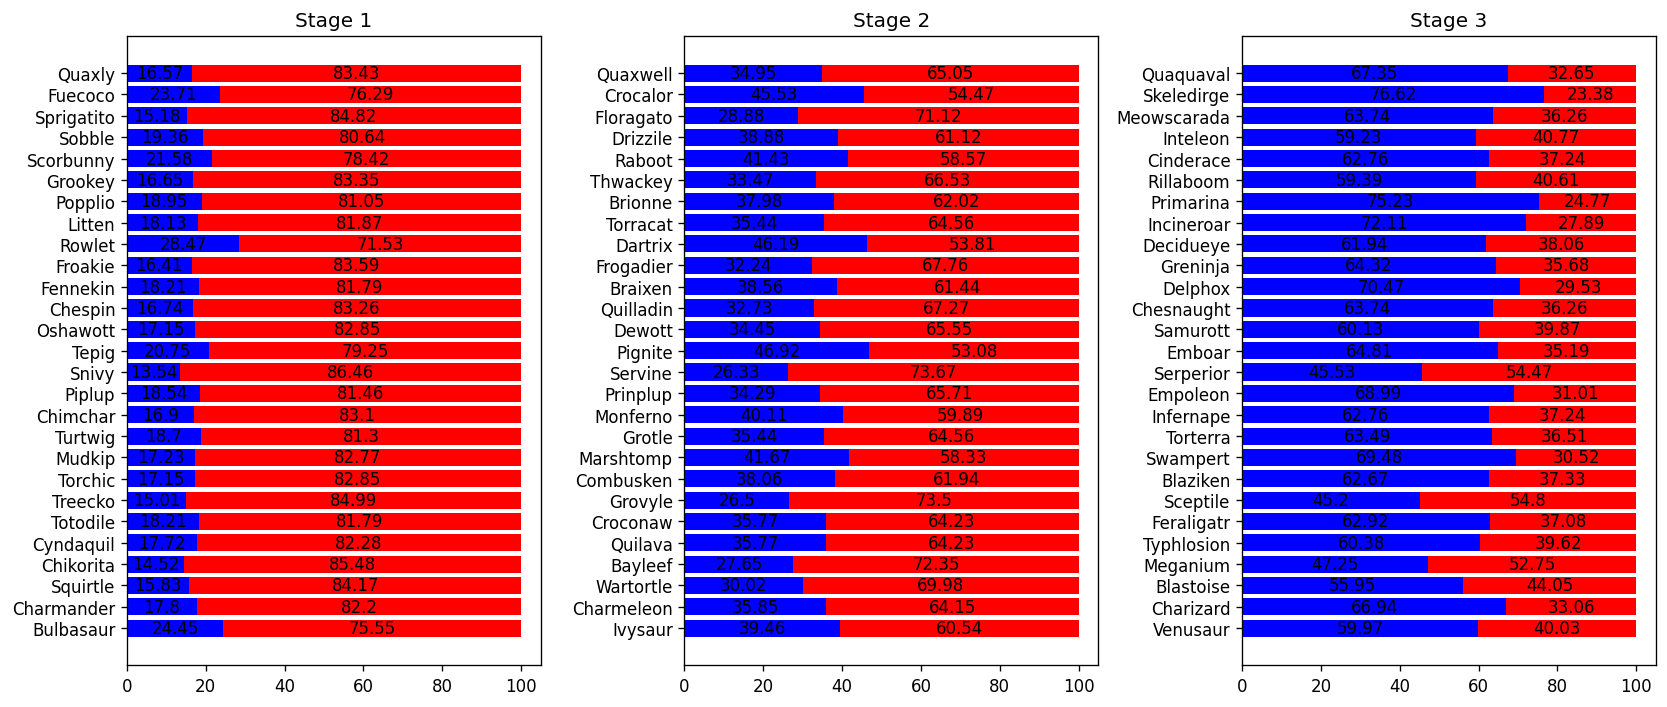

In [17]:
# plotting
fig, axes = plt.subplots(ncols=3, dpi=120, figsize=(14, 6))
for i, ax in enumerate(axes, start=1):
    data = starter_data.loc[starter_data["stage"] == i]
    x = data["name"]
    y = data["win_pct"]
    z = data["lose_pct"]
    bars_win = ax.barh(x, y, color="b")
    bars_lose = ax.barh(x, z, left=y, color="r")
    ax.bar_label(bars_win, label_type="center", fontsize=10)
    ax.bar_label(bars_lose, label_type="center", fontsize=10)
    if i == 1:
        ax.set_title("Stage 1")
    elif i == 2:
        ax.set_title("Stage 2")
    else:
        ax.set_title("Stage 3")
    plt.tight_layout()

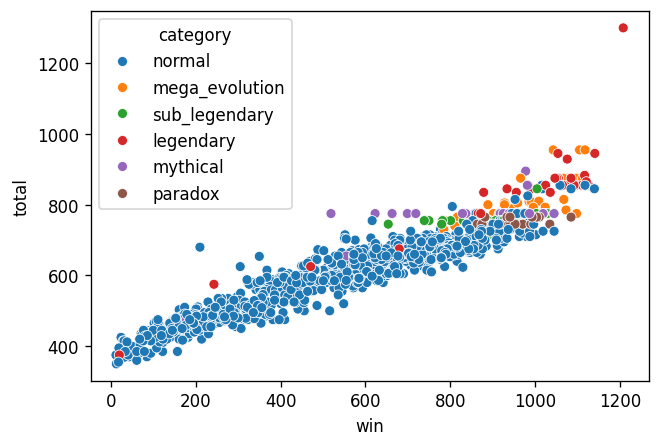

In [18]:
# correlation between total and wins
plt.figure(dpi=120, figsize=(6, 4))
sns.scatterplot(data=details, x="win", y="total", hue="category")
plt.show()

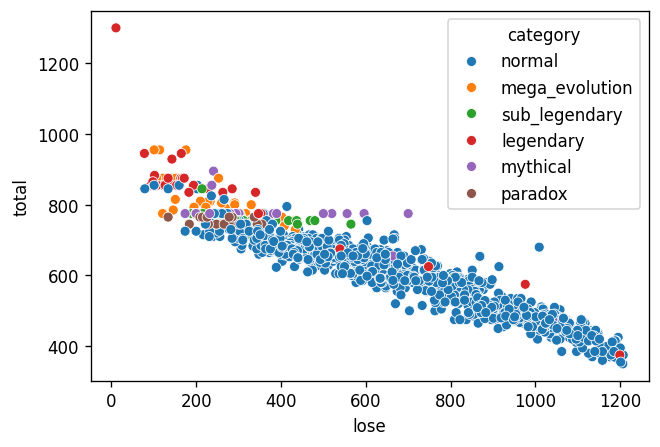

In [19]:
plt.figure(dpi=120, figsize=(6, 4))
sns.scatterplot(data=details, x="lose", y="total", hue="category")
plt.show()

### Generation Wise

In [20]:
normal = details.loc[details["category"] == "normal"]
legendary = details.loc[
    details["category"] == ("legendary" or "sub_legendary" or "mythical")
]
mega_evolution = details.loc[details["category"] == "mega_evolution"]
# plt.bar(legendary["gen"], legendary["win"], color="blue")
# plt.bar(normal["gen"], normal["win"], color="red")
# plt.xticks(np.arange(1, 10))
# plt.ylabel("Wins", fontweight="bold")
# plt.xlabel("Generation", fontweight="bold")
# plt.title("Generation Wise Average Wins", fontweight="bold")
# plt.show()
print(details["gen"].corr(details["win"]))

0.13809547162323027


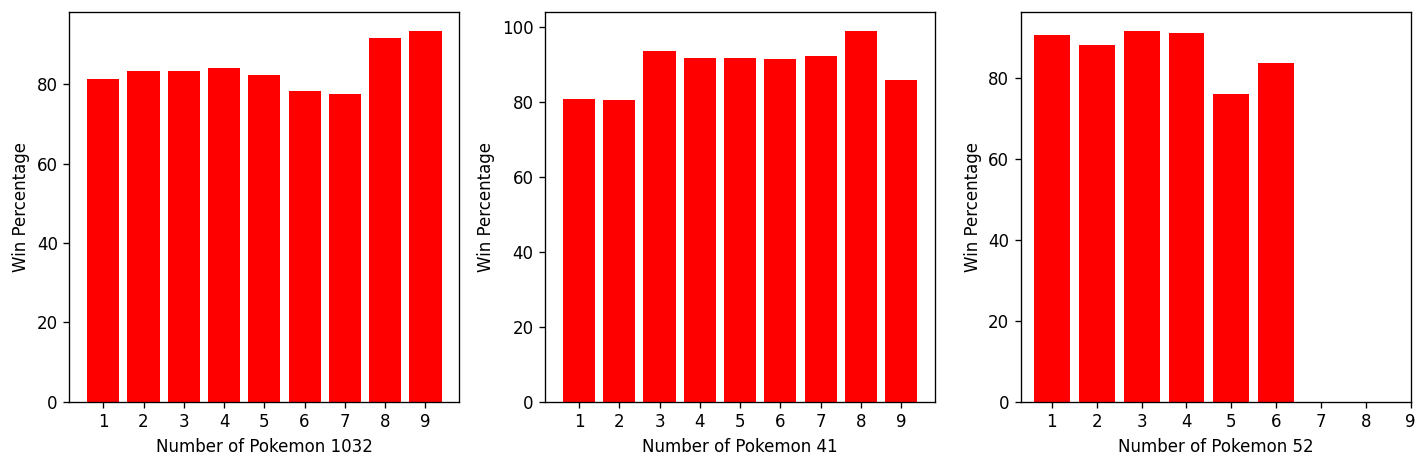

In [21]:
list_of_dataset = [normal, legendary, mega_evolution]
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=120, figsize=(12, 4))
for i, ax in enumerate(axes):
    data_set = list_of_dataset[i]
    ax.bar(data_set["gen"], data_set["win_pct"], color="r")
    ax.set_xticks(np.arange(1, 10))
    ax.set_xlabel(f"Number of Pokemon {len(data_set)}")
    ax.set_ylabel("Win Percentage")
    plt.tight_layout()

### Box Legendaries

In [25]:
details[details["category"] == "legendary"]

,number,name,type1,type2,total,hp,attack,defense,special_attack,special_defense,speed,main_attack,category,win,lose,leg_win,leg_lose,myth_win,myth_lose,mega_win,mega_lose,norm_win,norm_lose,win_pct,lose_pct,position,gen
202,150,Mewtwo,Psychic,Nil,855.0,181.0,130.0,110.0,174.0,110.0,150.0,174.0,legendary,984,235,48,38,15,14,26,26,883,149,80.72,19.28,81.5,1.0
315,249,Lugia,Psychic,Flying,855.0,181.0,110.0,150.0,110.0,174.0,130.0,110.0,legendary,983,236,46,40,21,8,28,24,878,154,80.64,19.36,83.5,2.0
472,382,Kyogre,Water,Nil,845.0,175.0,120.0,110.0,170.0,160.0,110.0,170.0,legendary,991,228,44,42,21,8,29,23,884,148,81.30,18.70,71.5,3.0
473,382,Kyogre Primal,Water,Nil,945.0,175.0,170.0,110.0,200.0,180.0,110.0,200.0,legendary,1054,165,50,36,21,8,34,18,935,97,86.46,13.54,39.5,3.0
474,383,Groudon,Ground,Nil,845.0,175.0,170.0,160.0,120.0,110.0,110.0,170.0,legendary,934,285,51,35,23,6,30,22,816,216,76.62,23.38,132.0,3.0
475,383,Groudon Primal,Ground,Fire,945.0,175.0,200.0,180.0,170.0,110.0,110.0,200.0,legendary,1141,78,67,19,26,3,39,13,993,39,93.60,6.40,2.0,3.0
476,384,Rayquaza,Dragon,Flying,855.0,180.0,170.0,110.0,170.0,110.0,115.0,170.0,legendary,1025,194,43,43,23,6,31,21,918,114,84.09,15.91,49.5,3.0
593,483,Dialga,Steel,Dragon,855.0,175.0,140.0,140.0,170.0,120.0,110.0,170.0,legendary,1097,122,53,33,19,10,32,20,979,53,89.99,10.01,18.5,4.0
594,483,Dialga Origin Forme,Steel,Dragon,855.0,175.0,120.0,140.0,170.0,140.0,110.0,170.0,legendary,1118,101,60,26,21,8,34,18,988,44,91.71,8.29,8.0,4.0
595,484,Palkia,Water,Dragon,855.0,165.0,140.0,120.0,170.0,140.0,120.0,170.0,legendary,1087,132,53,33,23,6,34,18,964,68,89.17,10.83,21.0,4.0
